## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

EARLYSTOPPING = {}

# monitor:acc, val_acc, loss, val_loss
es_vl_5 = EarlyStopping(monitor="val_loss", 
                          patience=5, 
                          verbose=1
                          )
EARLYSTOPPING['es_vl_5'] = es_vl_5
es_va_5 = EarlyStopping(monitor="val_acc", 
                          patience=5, 
                          verbose=1
                          )
EARLYSTOPPING['es_va_5'] = es_va_5
es_va_10 = EarlyStopping(monitor="val_acc", 
                          patience=10, 
                          verbose=1
                          )
EARLYSTOPPING['es_va_10'] = es_va_10
es_va_25 = EarlyStopping(monitor="val_acc", 
                          patience=25, 
                          verbose=1
                          )
EARLYSTOPPING['es_va_25'] = es_va_25

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for key in EARLYSTOPPING:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %s" % (key))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[EARLYSTOPPING[key]]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    results[key] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with BATCH_SIZE = es_vl_5


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None

Epoch 2/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.7429 - acc: 0.3940 - val_loss: 1.8174 - val_acc: 0.3757
Epoch 3/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6151 - acc: 0.4352 - val_loss: 1.7100 - val_acc: 0.4090
Epoch 4/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.5391 - acc: 0.4632 - val_loss: 1.6281 - val_acc: 0.4345
Epoch 5/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4838 - acc: 0.4830 - val_loss: 1.6002 - val_acc: 0.4466
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4389 - acc: 0.4979 - val_loss: 1.5543 - val_acc: 0.4585
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.3985 - acc: 0.5138 - val_loss: 1.5413 - val_acc: 0.4624
Epoch 8/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.3633 - acc: 0.5240 - val_loss: 1.5267 - val_acc: 0.4683
Epoch 9/50
50000/50000 [=================

50000/50000 [==============================] - 3s 57us/step - loss: 0.8769 - acc: 0.7100 - val_loss: 1.4764 - val_acc: 0.5010
Epoch 29/50
50000/50000 [==============================] - 3s 56us/step - loss: 0.8550 - acc: 0.7189 - val_loss: 1.4812 - val_acc: 0.5005
Epoch 30/50
50000/50000 [==============================] - 3s 56us/step - loss: 0.8341 - acc: 0.7273 - val_loss: 1.4904 - val_acc: 0.4970
Epoch 31/50
50000/50000 [==============================] - 3s 56us/step - loss: 0.8138 - acc: 0.7344 - val_loss: 1.5038 - val_acc: 0.4955
Epoch 32/50
50000/50000 [==============================] - 3s 56us/step - loss: 0.7942 - acc: 0.7427 - val_loss: 1.5146 - val_acc: 0.4962
Epoch 33/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.7730 - acc: 0.7516 - val_loss: 1.5249 - val_acc: 0.4947
Epoch 34/50
50000/50000 [==============================] - 3s 58us/step - loss: 0.7556 - acc: 0.7581 - val_loss: 1.5294 - val_acc: 0.4917
Epoch 35/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 58us/step - loss: 0.7057 - acc: 0.7793 - val_loss: 1.5543 - val_acc: 0.4986
Epoch 39/50
50000/50000 [==============================] - 3s 58us/step - loss: 0.6866 - acc: 0.7869 - val_loss: 1.5540 - val_acc: 0.4920
Epoch 40/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.6672 - acc: 0.7936 - val_loss: 1.5680 - val_acc: 0.4917
Epoch 41/50
50000/50000 [==============================] - 3s 56us/step - loss: 0.6521 - acc: 0.7990 - val_loss: 1.5802 - val_acc: 0.4903
Epoch 42/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.6335 - acc: 0.8065 - val_loss: 1.6015 - val_acc: 0.4907
Epoch 43/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.6152 - acc: 0.8132 - val_loss: 1.6080 - val_acc: 0.4916
Epoch 44/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.5975 - acc: 0.8204 - val_loss: 1.6232 - val_acc: 0.4907
Epoch 45/50
50000/50000 [=====================

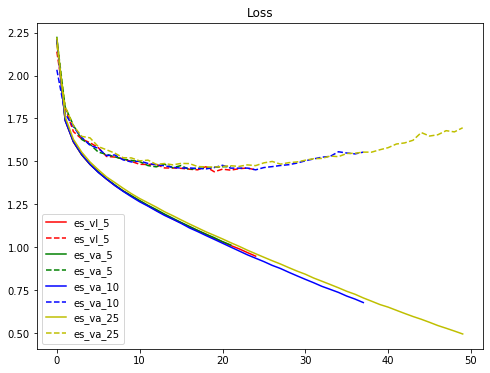

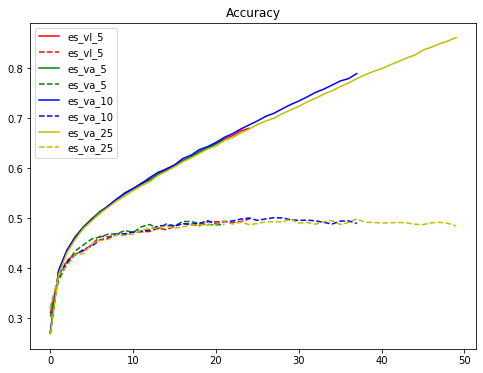

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Loss")
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Accuracy")
plt.show()